In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
data=pd.read_csv("Final.csv")

Data Preprocessing

In [3]:
# Step 1: Handle Missing Values
# Dropping rows with any missing values for simplicity. Alternatively, you could use imputation if needed.
data = data.dropna()

In [4]:
# Step 2: Encode Categorical Variables
# Assuming 'diagnosis' is the target column, encoding it as 0 and 1
label_encoder = LabelEncoder()
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

In [5]:
# Step 3: Separate Features and Target
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']


In [6]:
# Step 4: Normalize Features
# Using StandardScaler to normalize features for better ANN/DNN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Step 5: Split the Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:

# Final check of preprocessed data shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((406, 35), (102, 35), (406,), (102,))

ANN

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [10]:
# Step 1: Model Building
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Optional: Dropout layer for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Step 2: Model Compilation
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# Step 3: Model Training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7152 - loss: 0.6229 - val_accuracy: 0.8902 - val_loss: 0.3798
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9403 - loss: 0.3217 - val_accuracy: 0.9390 - val_loss: 0.2326
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9363 - loss: 0.2248 - val_accuracy: 0.9390 - val_loss: 0.1772
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9654 - loss: 0.1641 - val_accuracy: 0.9390 - val_loss: 0.1502
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9624 - loss: 0.1468 - val_accuracy: 0.9512 - val_loss: 0.1333
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9729 - loss: 0.0946 - val_accuracy: 0.9512 - val_loss: 0.1253
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9861 - loss: 0.0805 - val_accuracy: 0.9512 - val_loss: 0.1288
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9886 - loss: 0.0566 - val_accuracy: 0.9634 - val_loss

In [13]:
# Step 4: Model Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Predict and convert to binary format
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
              precision    recall  f1-score   support

           0       0.98      0.97      0.98        63
           1       0.95      0.97      0.96        39

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102

[[61  2]
 [ 1 38]]


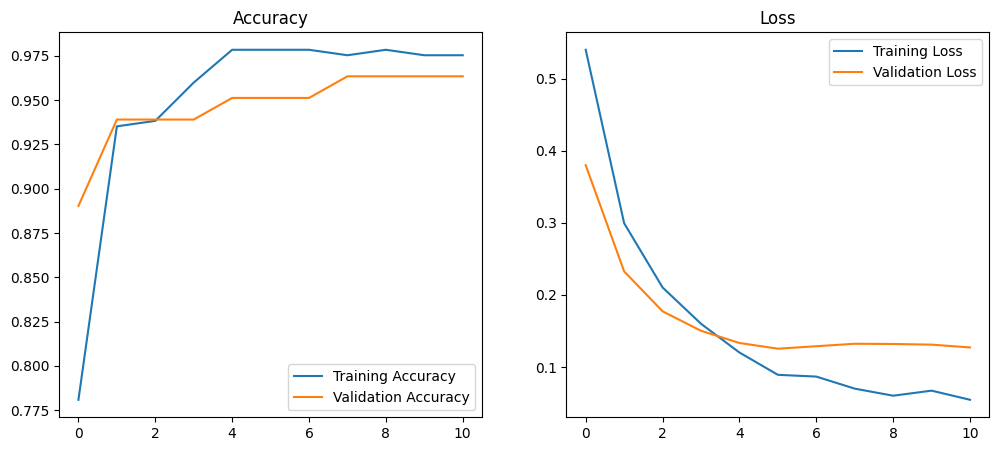

In [14]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()


GNN

In [23]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

# Load the CSV file
file_path = 'Final.csv'  # Replace with the actual file path
data = pd.read_csv(file_path)

# Prepare node features (excluding non-feature columns)
node_features = data.drop(columns=['Unnamed: 0', 'id', 'diagnosis']).values  # Adjust columns as necessary

# Set up K-Nearest Neighbors
k_neighbors = 5  # Number of neighbors
nbrs = NearestNeighbors(n_neighbors=k_neighbors, algorithm='ball_tree').fit(node_features)
distances, indices = nbrs.kneighbors(node_features)

# Create edges with weights
edges_with_weights = []
for i, neighbors in enumerate(indices):
    for j, neighbor in enumerate(neighbors[1:], start=1):  # Skip the first neighbor (itself)
        source = i
        destination = neighbor
        weight = distances[i][j]  # Distance as weight
        edges_with_weights.append((source, destination, weight))

# Save to a single CSV file
edges_df = pd.DataFrame(edges_with_weights, columns=["source", "destination", "weight"])
edges_df.to_csv('graph_edges.csv', index=False)

print("Graph edges with weights saved as graph_edges.csv")


Graph edges with weights saved as graph_edges.csv


In [26]:
!pip install torch-geometric


In [27]:
import pandas as pd
import torch
from torch_geometric.data import Data
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load node features and labels from Final.csv
node_data = pd.read_csv('Final.csv')
node_features = node_data.drop(columns=['Unnamed: 0', 'id', 'diagnosis']).values
label_encoder = LabelEncoder()
node_labels = label_encoder.fit_transform(node_data['diagnosis'])

# Load edges from graph_edges.csv
edge_data = pd.read_csv('graph_edges.csv')
edge_index = torch.tensor(edge_data[['source', 'destination']].values.T, dtype=torch.long)
edge_weight = torch.tensor(edge_data['weight'].values, dtype=torch.float)

# Convert features and labels to tensors
x = torch.tensor(node_features, dtype=torch.float)
y = torch.tensor(node_labels, dtype=torch.long)

# Create a PyTorch Geometric data object
data = Data(x=x, edge_index=edge_index, edge_attr=edge_weight, y=y)

# Split data into train and test sets
train_mask, test_mask = train_test_split(range(len(y)), test_size=0.2, stratify=y)
train_mask = torch.tensor(train_mask, dtype=torch.long)
test_mask = torch.tensor(test_mask, dtype=torch.long)


In [28]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, 16)
        self.conv2 = GCNConv(16, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Instantiate the model
model = GCN(num_features=x.size(1), num_classes=len(set(y.numpy())))
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)


In [29]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data)
    loss = F.nll_loss(out[train_mask], y[train_mask])
    loss.backward()
    optimizer.step()
    return loss

def test():
    model.eval()
    with torch.no_grad():
        logits = model(data)
        pred = logits[test_mask].max(1)[1]
        acc = pred.eq(y[test_mask]).sum().item() / test_mask.size(0)
    return acc

# Training loop
for epoch in range(1, 201):
    loss = train()
    if epoch % 10 == 0:
        acc = test()
        print(f'Epoch {epoch:03d}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')


Epoch 010, Loss: 101.2748, Test Accuracy: 0.3725
Epoch 020, Loss: 50.2521, Test Accuracy: 0.6765
Epoch 030, Loss: 24.9445, Test Accuracy: 0.6961
Epoch 040, Loss: 8.6529, Test Accuracy: 0.7647
Epoch 050, Loss: 4.4529, Test Accuracy: 0.8235
Epoch 060, Loss: 1.1651, Test Accuracy: 0.8725
Epoch 070, Loss: 1.5203, Test Accuracy: 0.8627
Epoch 080, Loss: 1.1667, Test Accuracy: 0.8824
Epoch 090, Loss: 1.0622, Test Accuracy: 0.8824
Epoch 100, Loss: 1.0327, Test Accuracy: 0.8725
Epoch 110, Loss: 1.0186, Test Accuracy: 0.8725
Epoch 120, Loss: 0.9978, Test Accuracy: 0.8725
Epoch 130, Loss: 0.9785, Test Accuracy: 0.8725
Epoch 140, Loss: 0.9590, Test Accuracy: 0.8725
Epoch 150, Loss: 0.9391, Test Accuracy: 0.8725
Epoch 160, Loss: 0.9186, Test Accuracy: 0.8725
Epoch 170, Loss: 0.8974, Test Accuracy: 0.8725
Epoch 180, Loss: 0.8755, Test Accuracy: 0.8725
Epoch 190, Loss: 0.8536, Test Accuracy: 0.8725
Epoch 200, Loss: 0.8317, Test Accuracy: 0.8725


In [30]:
from sklearn.metrics import classification_report, confusion_matrix

def test():
    model.eval()
    with torch.no_grad():
        logits = model(data)
        pred = logits[test_mask].max(1)[1]
        acc = pred.eq(y[test_mask]).sum().item() / test_mask.size(0)

        # Convert to numpy arrays for sklearn metrics
        y_true = y[test_mask].cpu().numpy()  # True labels
        y_pred = pred.cpu().numpy()  # Predicted labels

        # Calculate classification report and confusion matrix
        print("Classification Report:")
        print(classification_report(y_true, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_true, y_pred))

    return acc


In [43]:
for epoch in range(1, 101):
    loss = train()
    if epoch % 10 == 0:
        acc = test()  # This will print accuracy, precision, recall, F1-score, and confusion matrix
        print(f'Epoch {epoch:03d}, Loss: {loss:.4f}, Test Accuracy: {acc:.4f}')


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        64
           1       0.93      0.68      0.79        38

    accuracy                           0.86       102
   macro avg       0.88      0.83      0.84       102
weighted avg       0.87      0.86      0.86       102

Confusion Matrix:
[[62  2]
 [12 26]]
Epoch 010, Loss: 2.3024, Test Accuracy: 0.8627
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        64
           1       1.00      0.66      0.79        38

    accuracy                           0.87       102
   macro avg       0.92      0.83      0.85       102
weighted avg       0.89      0.87      0.87       102

Confusion Matrix:
[[64  0]
 [13 25]]
Epoch 020, Loss: 1.1522, Test Accuracy: 0.8725
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        64


In [42]:
from sklearn.metrics import classification_report, confusion_matrix

def test():
    model.eval()
    with torch.no_grad():
        logits = model(data)
        pred = logits[test_mask].max(1)[1]
        acc = pred.eq(y[test_mask]).sum().item() / test_mask.size(0)

        # Convert to numpy arrays for sklearn metrics
        y_true = y[test_mask].cpu().numpy()  # True labels
        y_pred = pred.cpu().numpy()  # Predicted labels

        # Classification Report and Confusion Matrix
        print("Classification Report:")
        print(classification_report(y_true, y_pred))
        print("Confusion Matrix:")
        print(confusion_matrix(y_true, y_pred))

    return acc


In [48]:
print(edge_index.max())  # Check the largest index in edge_index
print(X_test.shape[0])   # Check the number of nodes (rows) in X_test


tensor(507)
102


In [49]:
print("Max edge index:", edge_index.max())  # Maximum index in the edge_index
print("Number of nodes in X_test:", X_test.shape[0])  # Number of nodes in the feature matrix


Max edge index: tensor(507)
Number of nodes in X_test: 102


In [50]:
edge_index = edge_index[:, edge_index[0] < X_test.shape[0]]  # Ensure edge_index refers to valid nodes
